#### <span style='color:violet'>Codecademy: Airlines Analysis Project</span>

In [1]:
# imports
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from scipy.stats import pointbiserialr

In [2]:
# set path to data
input_folder = r'/Users/alexandrabrown/Desktop/data_science/datasets/Airline_Analysis'
input_file   = 'flight.csv'
input_path   = os.path.join(input_folder, input_file)

# load the data into DataFrame
df = pd.read_csv(input_path)
df

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1
129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4
129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3
129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5


1) What do coach ticket prices look like? What are the high and low values? What would be considered average? Does $500 seem like a good price for a coach ticket?

In [ ]:
# get min max & mean vals
min_price = df['coach_price'].min()
max_price = df['coach_price'].max()
mean_price = df['coach_price'].mean()

# customize bin orientation on plot
binwidth  = 10
bin_start = np.floor(min_price / binwidth)*binwidth
bin_end   = np.ceil(max_price / binwidth)*binwidth
bin_range = (bin_start, bin_end)

# plot hist of coach ticket prices to view the distribution
fig, axs = plt.subplots(figsize=(5,4))
sns.histplot(data=df, x='coach_price', stat='probability', alpha=0.6, binwidth=binwidth, binrange=bin_range, ax=axs)
axs.set_yticks(np.arange(0, 0.06, 0.01))
axs.yaxis.set_minor_locator(MultipleLocator(0.002))
axs.xaxis.set_minor_locator(MultipleLocator(20))
axs.tick_params(axis='both', which='major', length=3.5, width=2)

axs.set_ylabel('Probability', fontsize=12)
axs.set_xlabel('Coach Price ($)', fontsize=12)
axs.set_title('Distribution of Coach Prices', fontsize=14)

# plot mean line
axs.axvline(x=mean_price, linestyle='--', color='black', linewidth=2)

# label min, max, and mean
plt.text(x=40, y=0.05, s=f'Mean: {mean_price:.2f} ', fontsize=10)
plt.text(x=40, y=0.047, s=f'Min: {min_price:.2f}', fontsize=10)
plt.text(x=40, y=0.044, s=f'Max: {max_price:.2f}', fontsize=10)
plt.show()

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 ticket seem more reasonable than before?

In [ ]:
df8hr = df[df['hours'] == 8].reset_index(drop=True)

min_cost  = df8hr['coach_price'].min()
max_cost  = df8hr['coach_price'].max()
mean_cost = df8hr['coach_price'].mean()

# customize bin orientation on plot
binwidth  = 10
bin_start = np.floor(min_price / binwidth)*binwidth
bin_end   = np.ceil(max_price / binwidth)*binwidth
bin_range = (bin_start, bin_end)


fig, axs = plt.subplots(figsize=(5,4))
sns.histplot(data=df8hr, x='coach_price', stat='probability', binwidth=binwidth, binrange=bin_range)

axs.set_xlim([150, 600])
axs.set_xlabel('Coach Price ($)', fontsize=12)
axs.set_ylabel('Probability', fontsize=12)
axs.tick_params(axis='both', which='major', width=2, length=3.5)
axs.xaxis.set_minor_locator(MultipleLocator(10))
axs.yaxis.set_minor_locator(MultipleLocator(0.0025))

axs.axvline(x=mean_cost, linestyle='--', linewidth=1.5, color='k')
axs.text(x=160, y=0.065, s=f'Mean: {mean_cost:.2f}', fontsize=10)
axs.text(x=160, y=0.06, s=f'Min: {min_cost:.2f}', fontsize=10)
axs.text(x=160, y=0.055, s=f'Max: {max_cost:.2f}', fontsize=10)

axs.set_title('Distribution of Coach Price for 8h Flights', fontsize=12)
axs.grid(linestyle=':', linewidth=0.5)
plt.show()

3) How are flight delay times distributed? Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

In [ ]:
min_delay    = df['delay'].min()
max_delay    = df['delay'].max()
mean_delay   = df['delay'].mean()
median_delay = df['delay'].median()

binwidth = 2.5
bin_start = np.floor(min_delay/binwidth)*binwidth
bin_end   = np.ceil(max_delay/binwidth)*binwidth
binrange  = [bin_start, bin_end]

fig, axs = plt.subplots(figsize=(5,4))
sns.histplot(data=df, x='delay', stat='probability', binwidth=binwidth, binrange=binrange)
axs.set_xlim([0, 40])
axs.set_xlabel('Delay (h)', fontsize=12)
axs.set_xticks(np.arange(0, 45, 5))
axs.xaxis.set_minor_locator(MultipleLocator(2.5))
axs.set_ylabel('Probability', fontsize=12)
axs.tick_params(axis='both', which='major', length=3.5, width=2)
axs.grid(linestyle=':', linewidth=0.5)

axs.text(x=30, y=0.35, s=f'Mean: {mean_delay:.2f}', fontsize=10)

plt.show()



In [ ]:
# what proportion of the flights have a delay above 40 hours?
long_delay = df[df['delay'] > 40].reset_index(drop=True)
long_delay_perc = (len(long_delay)/len(df))*100
print(f'The percentage of flights with a greater than 40h delay is: {long_delay_perc:.2f}%')

4) Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

In [ ]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

fig, axs = plt.subplots(figsize=(5,4))

sns.scatterplot(data=df, x='coach_price', y='firstclass_price', alpha=0.6, size=5, legend=False)
# add trend line on top of scatter
sns.regplot(data=df, x='coach_price', y='firstclass_price', color='red', scatter=False)
axs.set_xlabel('Coach Price ($)')
axs.set_ylabel('First Class Price ($)')
axs.set_yticks(np.arange(1000, 1900, 200))
axs.grid(linestyle=':', linewidth=0.5)

plt.show()

5. What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

In [ ]:
# idea 1) plot scatter matrix to visualize trends between features and price?
# idea 2) correlation of each feature and the price - point biserial correlation (bc 1 cont and 1 categorical var)
features = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi']

# init corr_dict for storing corr coeff
corr_dict = {}

for feat in features:
    # map feats to int values
    df[f'{feat}_int'] = df[feat].map({'Yes':1, 'No':0})
    # run the corr
    corr, pval = pointbiserialr(df[f'{feat}_int'], df['coach_price'])

    # add corr into dict
    corr_dict[f'{feat}_price'] = corr


corr_dict

Looking at the point biserial correlations we can see that inflight entertainment has a higher correlation with coach price than the other two inflight features.

In [ ]:
# create boxplots to observe these relationships
fig, axs = plt.subplots(1, 3, figsize=(7, 4))

x_order = ['Yes', 'No']

for i, feat in enumerate(features):
    ax=axs[i]
    sns.boxplot(data=df, x=feat, y='coach_price', ax=ax, hue=feat, order=x_order)

plt.tight_layout()
plt.show()

6. How does the number of passengers change in relation to the length of flights?

In [ ]:
fig, axs = plt.subplots(figsize=(5,4))

#sns.histplot(data=df, x='hours')
sns.barplot(data=df, x='hours', y='passengers', errorbar='sd', capsize=0.2)
plt.show()

In [ ]:
# calc mean & median number of passengers for each flight duration
print(df.groupby(['hours'])['passengers'].mean())
print(df.groupby(['hours'])['passengers'].median())

In [ ]:
# sanity check -- distribution of number of passengers for every 1 hour flight
hours1 = df[df['hours'] == 1].copy().reset_index(drop=True)

mean_pass_hours1 = hours1['passengers'].mean()

fig, axs = plt.subplots(figsize=(5,4))
sns.histplot(data=hours1, x='passengers')
axs.axvline(mean_pass_hours1, linestyle='--', color='black')
axs.text(x=140, y=800, s=f'Mean: {mean_pass_hours1:.2f}')

plt.show()

In [ ]:
df

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

In [3]:
# filter the dataframe and convert to long format for easier plotting
filt_df = df.loc[:, ['weekend', 'coach_price', 'firstclass_price']].copy()


long_df = pd.melt(filt_df, 
                  id_vars ='weekend',
                  value_vars=['coach_price', 'firstclass_price'], 
                  var_name='flight_class',
                  value_name='price')


long_df['flight_class'] = long_df['flight_class'].str.replace('_price', '')
long_df

,weekend,flight_class,price
0,Yes,coach,338.820
1,Yes,coach,472.655
2,Yes,coach,351.960
3,Yes,coach,387.835
4,No,coach,374.735
...,...,...,...
259555,Yes,firstclass,1478.700
259556,Yes,firstclass,1616.010
259557,Yes,firstclass,1481.490
259558,Yes,firstclass,1589.700


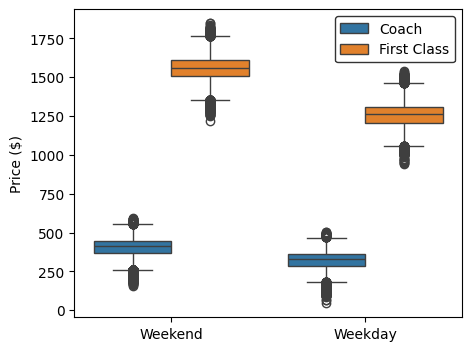

In [7]:
# a grouped boxplot should work well for this since we have both categorical and numerical data

fig, axs = plt.subplots(figsize=(5,4))
sns.boxplot(data=long_df, x='weekend', y='price', hue='flight_class')

# customize legend
label_map = {'coach': 'Coach', 'firstclass': 'First Class'}
handles, labels = axs.get_legend_handles_labels()
axs.legend(handles=handles, 
           labels=[label_map[l] for l in labels],
           title=None,
           edgecolor='black')

axs.set_xlabel('')
axs.set_xticks([0,1], ['Weekend', 'Weekday'])
axs.set_ylabel('Price ($)')
plt.show()

8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [8]:
df

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1
129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4
129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3
129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5


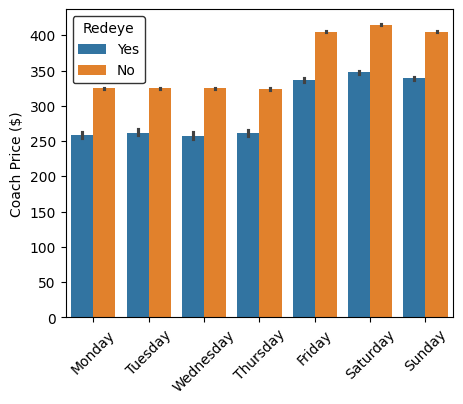

In [16]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axs = plt.subplots(figsize=(5,4))
sns.barplot(data=df, x='day_of_week', y='coach_price', hue='redeye', order=day_order)
axs.set_xticks(np.arange(0, len(day_order), 1))
axs.set_xticklabels(day_order, rotation=45)
axs.set_ylabel('Coach Price ($)')
axs.set_xlabel('')
axs.legend(title='Redeye', edgecolor='black')
plt.show()